# Linear Regression 2

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Data preprocessing

In [3]:
df = pd.read_csv("car driving risk analysis.csv")
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [7]:
train_data = df.sample(frac=0.6, random_state=42)
test_data = df.drop(train_data.index)
print(train_data)
print()
print(test_data)

    speed  risk
9     260    91
11    185    59
0     200    95
13     95    18
5     115    10
8     190    45
2     300    98
1      90    20
14     30     2

    speed  risk
3     110    60
4     240    72
6      50     7
7     230    85
10    290    82
12    310    93


Text(0.5, 1.0, 'Car driving risk analysis')

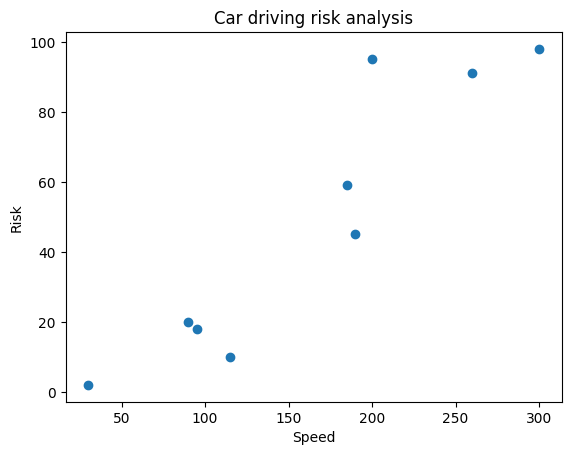

In [12]:
x = train_data[['speed']]
y = train_data[['risk']]

plt.scatter(x, y)
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Car driving risk analysis")

Linear Regression

Train model

In [15]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

Prediction

In [24]:
pred = reg.predict(test_data[['speed']])
test_data['Predicted risk'] = pred
test_data

,speed,risk,Predicted risk
3,110,60,26.976435
4,240,72,80.402901
6,50,7,2.318065
7,230,85,76.293173
10,290,82,100.951542
12,310,93,109.170998


In [31]:
df["predicted risk"] = reg.predict(df[['speed']])
df

,speed,risk,predicted risk
0,200,95,63.963988
1,90,20,18.756978
2,300,98,105.061270
3,110,60,26.976435
4,240,72,80.402901
5,115,10,29.031299
6,50,7,2.318065
7,230,85,76.293173
8,190,45,59.854260
9,260,91,88.622357


Score

In [32]:
r2_score(df['predicted risk'], df['risk'])

0.8250237076603752

Plot


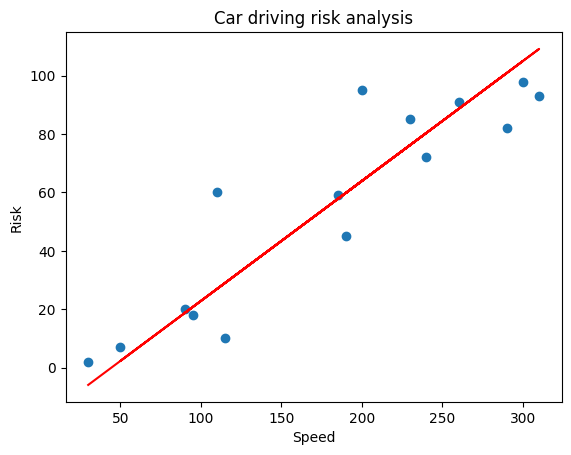

In [34]:
x = df[['speed']]
y = df[['risk']]

plt.scatter(x, y, label='Actual risk')
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Car driving risk analysis")

plt.plot(x, df['predicted risk'], label='Best fit line', color='red')